<a href="https://colab.research.google.com/github/msiddalingaiah/MachineLearning/blob/master/Notebooks/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib Example

This is an example notebook describing the basics of Matplotlib, a plotting library for Python. Here's a great [quick start tutorial](https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html), more details are available on the [Matplotlib Home Page](https://matplotlib.org/).

This example uses an [automotive](https://archive.ics.uci.edu/ml/datasets/Automobile) data set from [University of California, Irvine](https://uci.edu/).

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math
from sklearn import datasets
from matplotlib.colors import ListedColormap

## Basic Line Plot

The following example generates sine a cosine curves as a list of values and plots them. Some basic plot customizations are also demonstrated.

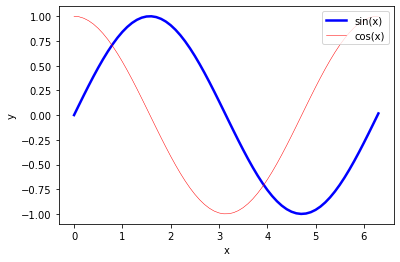

In [2]:
x = [0.1*i for i in range(64)]
sin = [math.sin(i) for i in x]
cos = [math.cos(i) for i in x]

plt.plot(x, sin, label='sin(x)', color='blue', linewidth=2.5)
plt.plot(x, cos, label='cos(x)', color='red', linewidth=0.5)
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='upper right')
plt.show()

## Basic Bar Chart

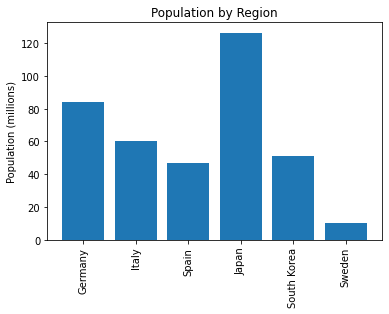

In [3]:
regions = ['Germany', 'Italy', 'Spain', 'Japan', 'South Korea', 'Sweden']
population = {'Germany':83783942, 'Italy':60461826, 'Spain':46754778, 'India':1380004385,
              'United States':331002651, 'Japan':126476461, 'South Korea':51269185, 'Sweden':10099265}

y_pos = range(len(regions))
values = [population[r]/1e6 for r in regions]

plt.bar(y_pos, values, align='center')
plt.xticks(y_pos, regions, rotation='vertical')
plt.ylabel('Population (millions)')
plt.title('Population by Region')
plt.show()

## Color Maps

Colors can be controlled with color maps. Matplotlib has a number of built-in color maps documented in this [reference](https://matplotlib.org/examples/color/colormaps_reference.html).

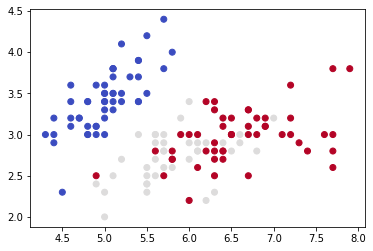

In [4]:
iris = datasets.load_iris()

# Select all rows and only first two columns (sepal length/width)
X = iris.data[:, :2]

# Target will be used to plot samples in different colors for different species
Y = iris.target

# Use built-in color map, see https://matplotlib.org/examples/color/colormaps_reference.html
plt.scatter(X[:,0], X[:,1], c=Y, cmap='coolwarm')

You can also create your own [custom color map](https://matplotlib.org/3.1.0/tutorials/colors/colormap-manipulation.html) using ListedColormap.

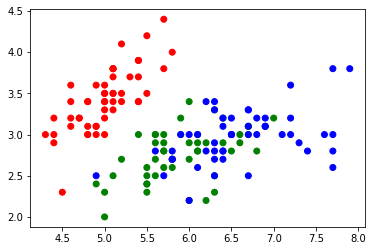

In [5]:
colors =["red", "green", "blue"]
custom_map = ListedColormap(colors)

plt.scatter(X[:,0], X[:,1], c=Y, cmap=custom_map)

## Plotting Pandas Data

Pandas can create plots directly from a data frame. The following cell loads automobile data from a text file.

In [6]:
!wget https://raw.githubusercontent.com/msiddalingaiah/MachineLearning/master/Notebooks/data/imports-85.data

--2020-06-11 16:51:52--  https://raw.githubusercontent.com/msiddalingaiah/MachineLearning/master/Notebooks/data/imports-85.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25936 (25K) [text/plain]
Saving to: ‘imports-85.data.1’

imports-85.data.1   100%[===================>]  25.33K  --.-KB/s    in 0.01s   

2020-06-11 16:51:52 (2.00 MB/s) - ‘imports-85.data.1’ saved [25936/25936]



In [0]:
columnNames = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style',
               'drive_wheels','engine_location','wheel_base','length','width','height','curb_weight',
               'engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio',
               'horsepower','peak_rpm','city_mpg','highway_mpg','price']

cars = pd.read_csv('imports-85.data', sep=',', names = columnNames)

There are some missing values for horsepower and price. The following cell selects only rows with numeric values for horsepower and price, then it converts those columns to floating point types.

In [0]:
df = cars[cars.horsepower.str.isnumeric() & cars.price.str.isnumeric()].copy()
df.horsepower = df.horsepower.astype(float)
df.price = df.price.astype(float)

Pandas dataframes contain an easy to use plot method. The following scatter plot shows that more expensive cars tend to produce more power.

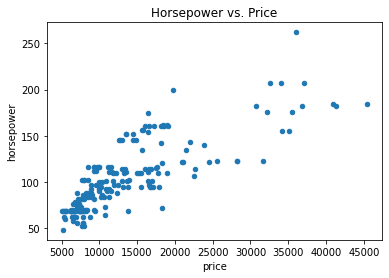

In [9]:
df.plot(kind='scatter', x='price', y='horsepower', title='Horsepower vs. Price')

## Aggregating Data

Pandas can perform aggregate calculations, similar to by the group-by clause in SQL. The following example is equivalent of the SQL query

`SELECT count(make) FROM cars GROUP BY make ORDER BY make`

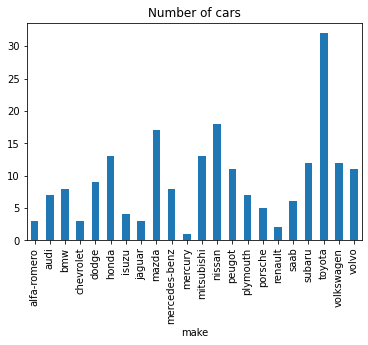

In [10]:
# This could all be done in one line, but it has been formatted for clarity

groups = cars.groupby(['make'], sort=True)
counts = groups['make'].count()
counts.plot(kind='bar', title='Number of cars')

## Markers and Axes

The third argument to plt.plot(...) is a format string that can be used to specify plot marker, line, and color. The details are documented in the [format strings](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html) section.

[plt.axis(...)](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.axis.html) defines the min/max values of each axis.

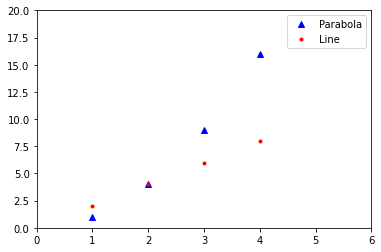

In [11]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], '^b', label='Parabola')
plt.plot([1, 2, 3, 4], [2, 4, 6, 8], '.r', label='Line')
plt.legend(loc='upper right')
plt.axis([0, 6, 0, 20])
plt.show()

## Subplots

[Subplots](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplot.html) can be create in a grid with a number of rows and columns. The position of a subplot is defined using three integers: the number of rows, the number of columns, and the plot index left to right.

For example, 2, 1, 2 means 2 rows, 1 column, second plot.

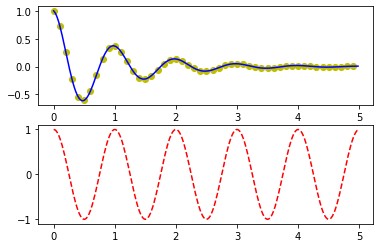

In [12]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t1, f(t1), 'oy', t2, f(t2), '-b')

plt.subplot(2, 1, 2)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()